#Introduction

Nama: Hana Rifdah Sakinah -  Batch 006

---

###**Dataset Information**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often,  more than one contact to the same client was required,  in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

This dataset contain 488 rows and 20 columns,  start from May 2008 until November 200

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)


###**Atrribute Information**

* **age** (*numeric*)
* **job** : type of job (*categorical*: 'admin.',  'blue-collar',  'entrepreneur',  'housemaid',  'management',  'retired',  'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* **marital** : marital status (*categorical*: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
* **education** (*categorical*: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* **default**: has credit in default? (*categorical*: 'no', 'yes', 'unknown')
* **housing**: has housing loan? (*categorical*: 'no', 'yes', 'unknown')
* **loan**: has personal loan? (*categorical*: 'no', 'yes', 'unknown')


#####*related with the last contact of the current campaign*:


* **contact**: contact communication type (*categorical*: 'cellular', 'telephone')
* **month**: last contact month of year (*categorical*: 'jan',  'feb',  'mar',  ...,  'nov',  'dec')
* **day_of_week**: last contact day of the week (*categorical*: 'mon', 'tue', 'wed', 'thu', 'fri')
* **duration**: last contact duration,  in seconds (*numeric*). Important note: this attribute highly affects the output target (e.g.,  if duration=0 then y='no'). Yet,  the duration is not known before a call is performed. Also,  after the end of the call y is obviously known. Thus,  this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


####*other attributes*:


* **campaign**: number of contacts performed during this campaign and for this client (*numeric*,  includes last contact)
* **pdays**: number of days that passed by after the client was last contacted from a previous campaign (*numeric*; 999 means client was not previously contacted)
* **previous**: number of contacts performed before this campaign and for this client (*numeric*)
* **poutcome**: outcome of the previous marketing campaign (*categorical*: 'failure', 'nonexistent', 'success')


#### *social and economic context attributes*:


* **emp.var.rate**: employment variation rate quarterly indicator (*numeric*)
* **cons.price.idx**: consumer price index monthly indicator (*numeric*)
* **cons.conf.idx**: consumer confidence index monthly indicator (*numeric*)
* **euribor3m**: euribor 3 month rate daily indicator (*numeric*)
* **nr.employed**: number of employee quarterly indicator (*numeric*)

**Output variable** (desired target):


has the client subscribed a term deposit? (*binary*: 'yes', 'no')

Logistic Regression, SVM (SVC), Decision Tree, Random Forest, Catboost, KNN, Naive Bayes 



In [1]:
!pip install feature-engine
!pip install catboost
import warnings 
warnings.filterwarnings('ignore')

     |████████████████████████████████| 205 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 30.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.utils import shuffle

#Data Loading

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hanarifdahs/datasets/main/bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#EDA

**What is the precentage of each values in the target variable?**

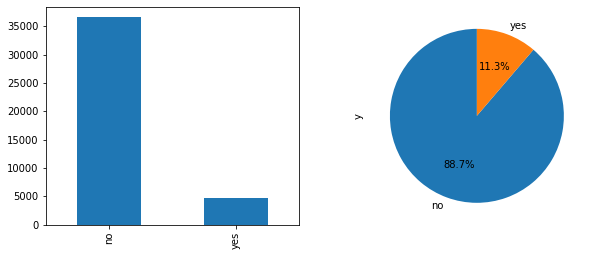

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['y'].value_counts().plot(kind='bar', ax=axs[0])
df['y'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

**Distributions of numeric columns**

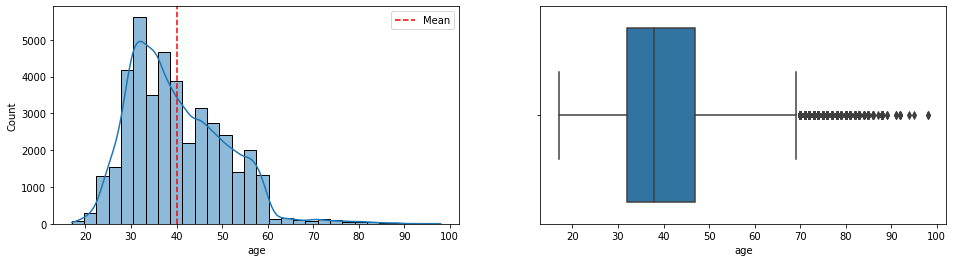

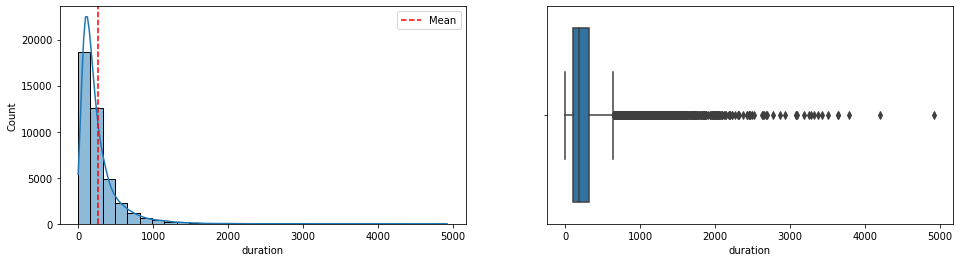

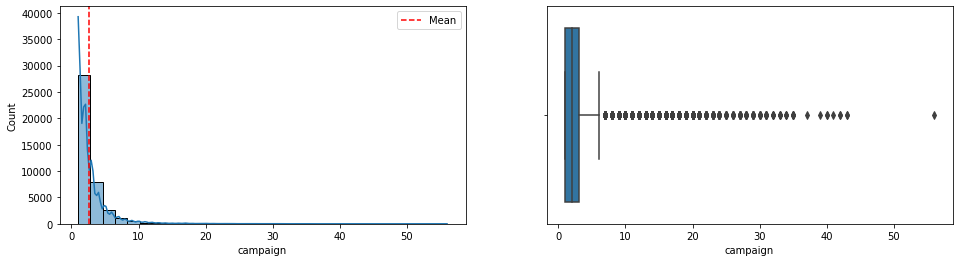

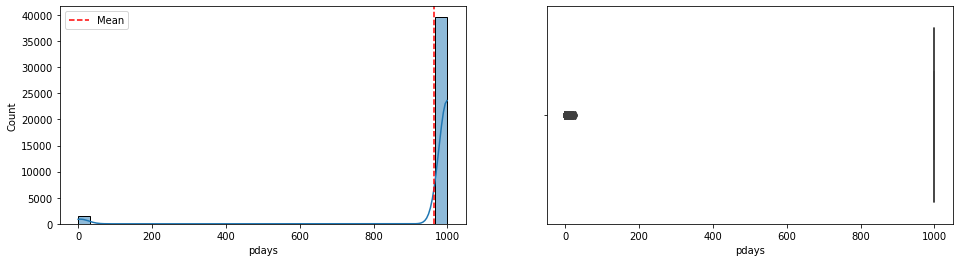

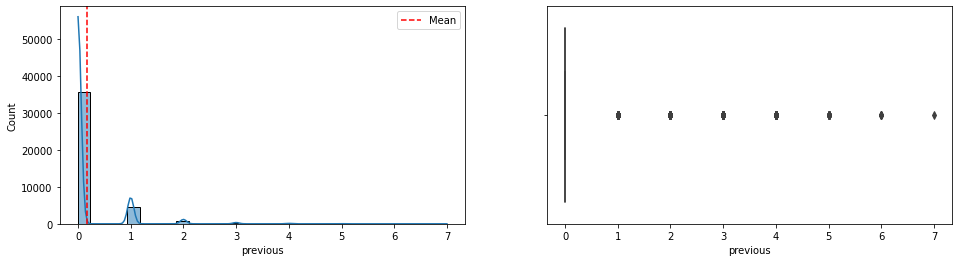

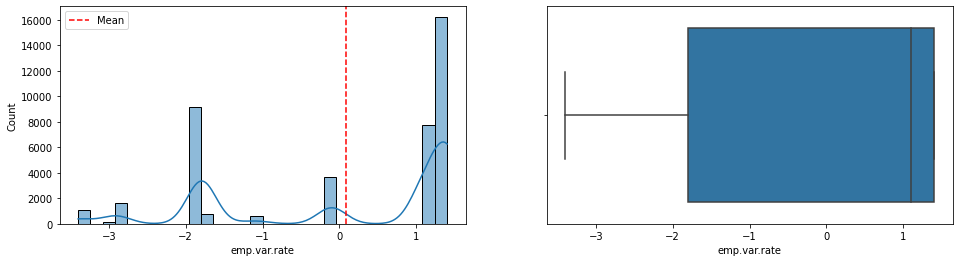

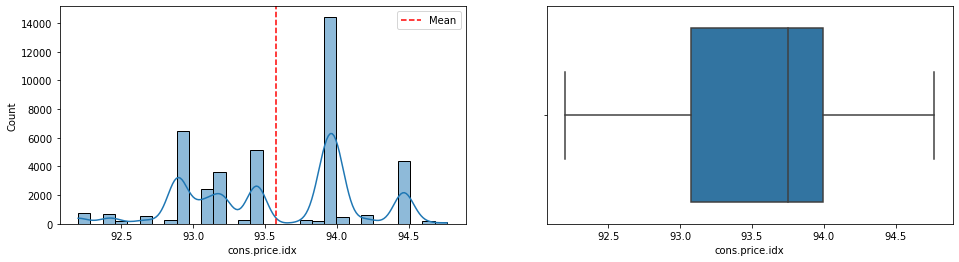

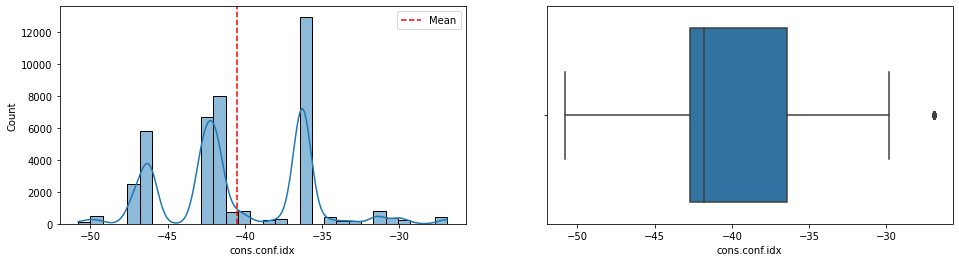

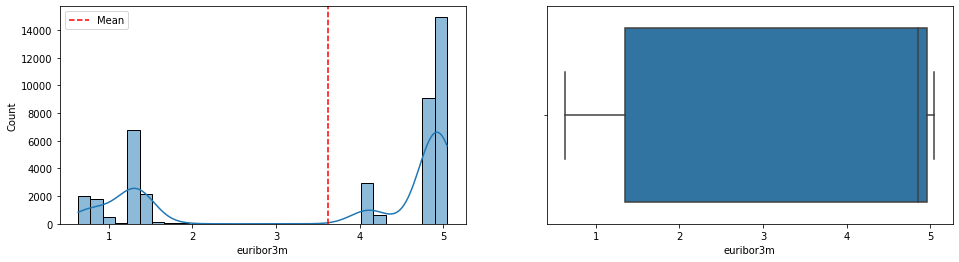

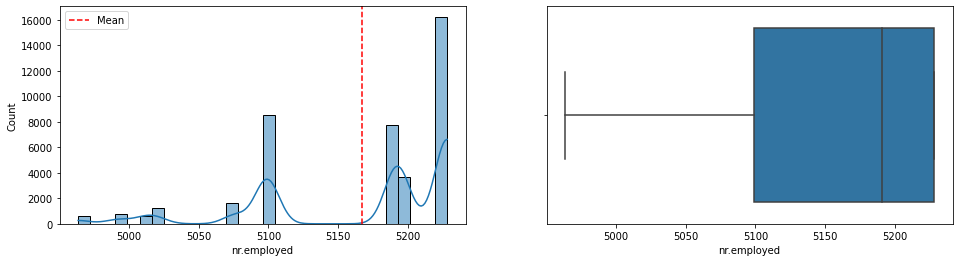

In [8]:
num_col = df._get_numeric_data()

for i in num_col:
  fig, axs = plt.subplots(1,2, figsize=(16,4))
  sns.histplot(num_col[i], bins = 30, kde = True, ax = axs[0])
  sns.boxplot(num_col[i], ax = axs[1])

  axs[0]. axvline(num_col[i].mean(), color = 'red', linestyle = 'dashed', label='Mean')
  axs[0].legend()

**Age group in subscribing term deposit**

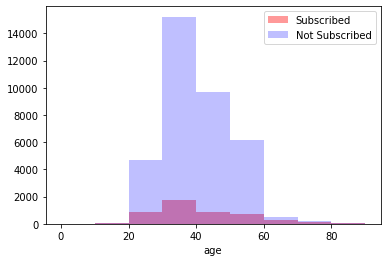

In [9]:
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.y == 'yes'], color = 'red', kde = False, bins = bins, label = 'Subscribed')
sns.distplot(df.age[df.y == 'no'], ax = ax, color = 'blue', kde = False,hist_kws=dict(alpha=0.25), bins = bins, label = 'Not Subscribed')
plt.legend()
plt.show()

Based on the age group most of 30-ish years tend to subscribe a deposit than any other age group

**Is marital status affects deposit subscribe?**

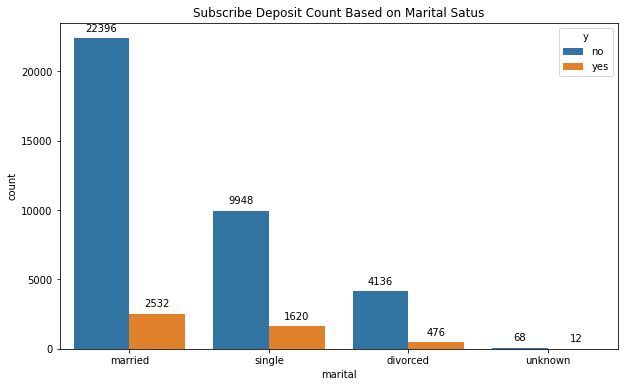

In [10]:
plt.figure(figsize = (10,6))
plt.title('Subscribe Deposit Count Based on Marital Satus')
fig = sns.countplot(x = df['marital'], hue=df['y'])
for p in fig.patches:
  fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In marital status group married couple likely to subscribe deposit than single and divorced status. This could likely become one of our features.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

**What kind of jobs likely to subscribe deposit?**

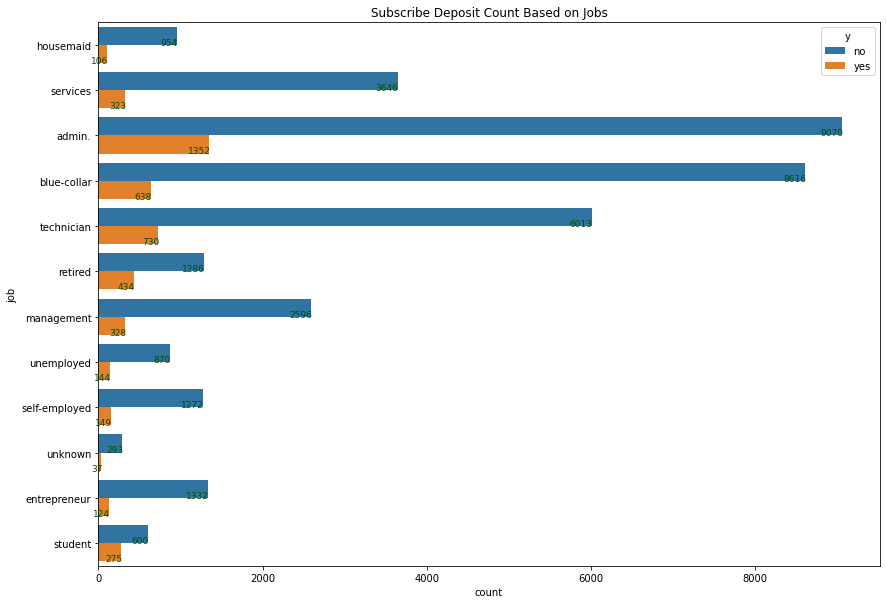

In [11]:
plt.figure(figsize = (14,10))
plt.title('Subscribe Deposit Count Based on Jobs')
fig = sns.countplot(y = df['job'], hue=df['y'])
for p in fig.patches:
    fig.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=9,color='#004d00',textcoords='offset points', horizontalalignment='right')
plt.show()

admin, technician, and blue-collar likely to subscribe deposit. But we think this feature does not impact much in predict variable. So we will drop it

**Is Education affect someone to subscribe a term deposit?**

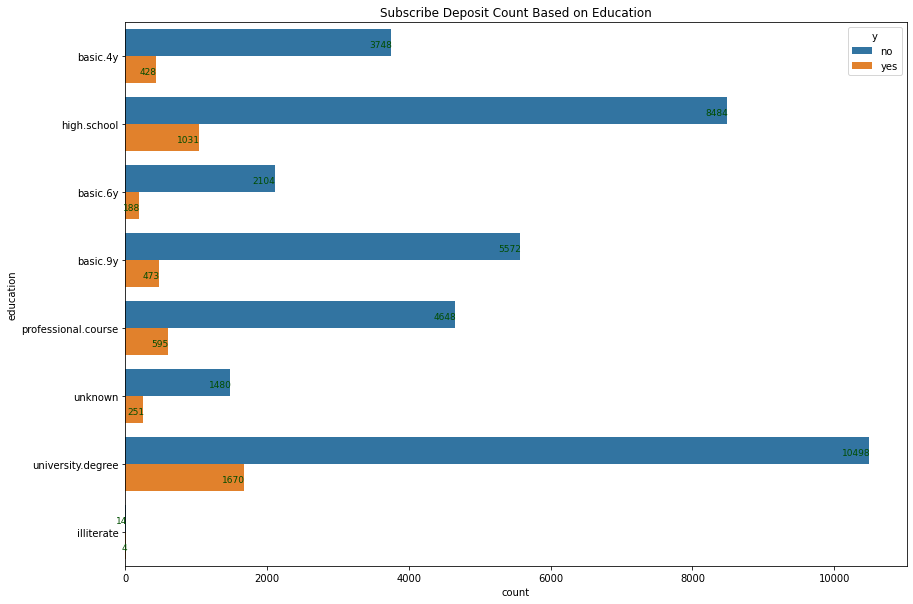

In [12]:
plt.figure(figsize = (14,10))
plt.title('Subscribe Deposit Count Based on Education')
fig = sns.countplot(y = df['education'], hue=df['y'])
for p in fig.patches:
    fig.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=9,color='#004d00',textcoords='offset points', horizontalalignment='right')
plt.show()

**Correlation between numeric variables**

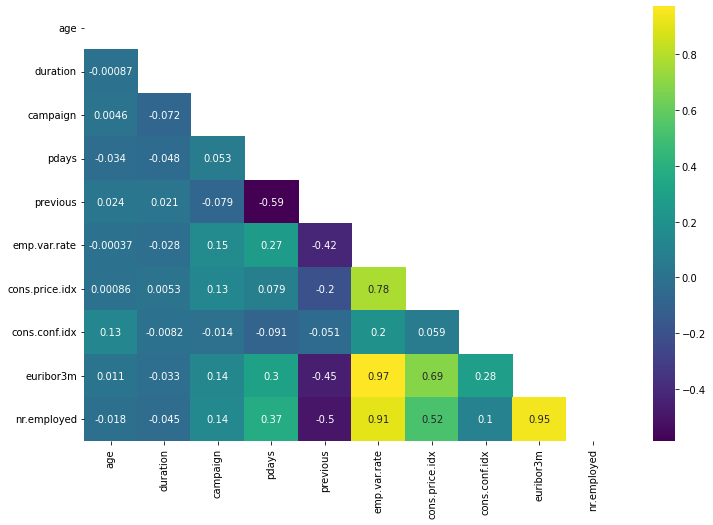

In [13]:
plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True, cmap='viridis', mask=mask)

There are high correlation between some features:

- euribor3m - emp.var.rate (97%)

- nr.employed - emp.var.rate (91%)

- nr.employed - euribor3m (95%)



**Correlation of each numeric variables based on label**

In [14]:
df['y'] = df['y'].map({'yes': 1, 'no':0})
target = ['y']
corr = df.corr()
print(corr['y'].sort_values(ascending=False), '\n')

y                 1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64 



There are no significant correlation, but we will take into account on duration, previous, and cons.conf.idx

# Data Preprocessing

## Drop Columns

In [15]:
df.drop(['emp.var.rate','nr.employed'], axis = 1, inplace = True)

##Cardinality

In [16]:
obj_col = df.select_dtypes(include=['object'])
for cat in obj_col:
  count = len(df[cat].unique())
  print(f"Cardinality of column {cat} is {count}")

Cardinality of column job is 12
Cardinality of column marital is 4
Cardinality of column education is 8
Cardinality of column default is 3
Cardinality of column housing is 3
Cardinality of column loan is 3
Cardinality of column contact is 2
Cardinality of column month is 10
Cardinality of column day_of_week is 5
Cardinality of column poutcome is 3


In [17]:
df['job'] = df.job.astype('category')
df['marital'] = df.marital.astype('category')
df['education'] = df.education.astype('category')
df['default'] = df.default.astype('category')
df['housing'] = df.housing.astype('category')
df['loan'] = df.loan.astype('category')
df['contact'] = df.contact.astype('category')
df['poutcome'] = df.poutcome.astype('category')

In [18]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [19]:
months = {
    'mar':3,
    'apr' :4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct' : 10,
    'nov':11,
    'dec':12
}
df['month'] = df['month'].apply(lambda x: months[x])

In [20]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [21]:
date = {
    'mon':1,
    'tue' : 2,
    'wed': 3,
    'thu':4,
    'fri':5
}
df['day_of_week'] = df['day_of_week'].apply(lambda x: date[x])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  int64   
 9   day_of_week     41188 non-null  int64   
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

##Split Data 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, df.y, test_size=0.3, random_state=42, stratify = df [['y', 'default']])
X_train.shape, X_test.shape

((28831, 19), (12357, 19))

In [24]:
X_train.drop(['y'], axis = 1, inplace = True)

In [25]:
X_test.drop(['y'], axis = 1, inplace = True)

In [26]:
X_train.shape, X_test.shape

((28831, 18), (12357, 18))

##Handling Outliers

###Handling Outliers in Train Set

In [27]:
num_train = X_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 1.18%
Column month outliers = 0.00%
Column day_of_week outliers = 0.00%
Column duration outliers = 7.29%
Column campaign outliers = 8.37%
Column pdays outliers = 100.00%
Column previous outliers = 100.00%
Column cons.price.idx outliers = 0.00%
Column cons.conf.idx outliers = 1.10%
Column euribor3m outliers = 0.00%


In [28]:
num_train.describe()

,age,month,day_of_week,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.064028,6.606396,2.979050,258.485311,2.575284,963.109639,0.173771,93.577385,-40.498224,3.628805
std,10.440040,2.034777,1.410645,260.328044,2.793446,185.349401,0.497354,0.577777,4.620019,1.731875
min,17.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.000000,5.000000,2.000000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000
50%,38.000000,6.000000,3.000000,179.000000,2.000000,999.000000,0.000000,93.798000,-41.800000,4.857000
75%,47.000000,8.000000,4.000000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000
max,98.000000,12.000000,5.000000,4918.000000,56.000000,999.000000,6.000000,94.767000,-26.900000,5.045000


In [29]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['campaign','cons.conf.idx','duration'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)

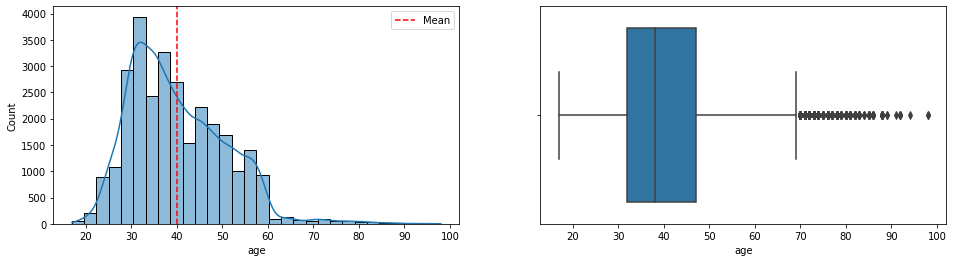

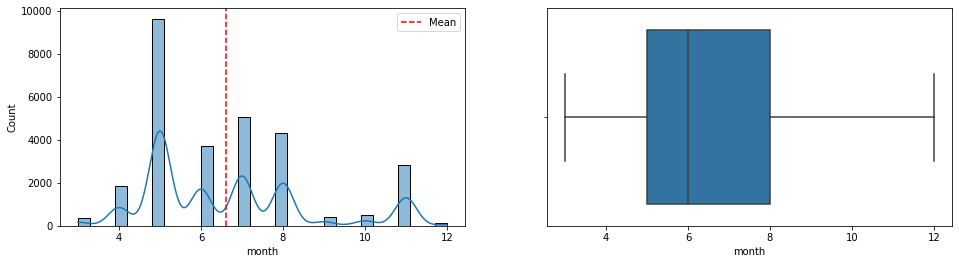

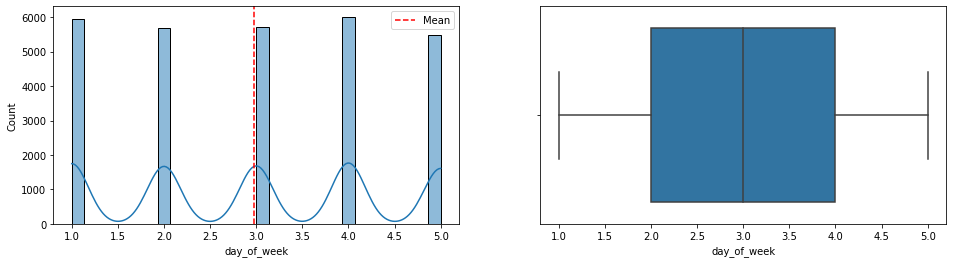

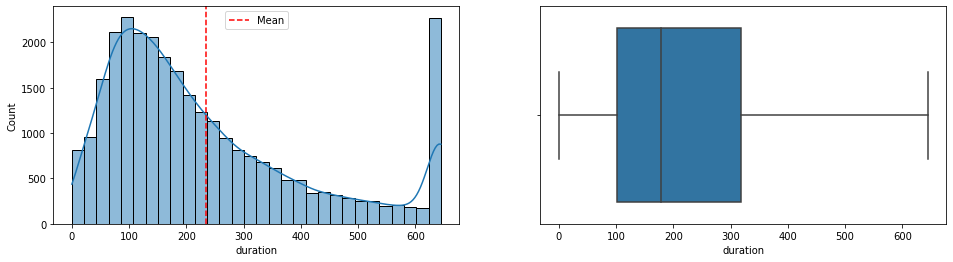

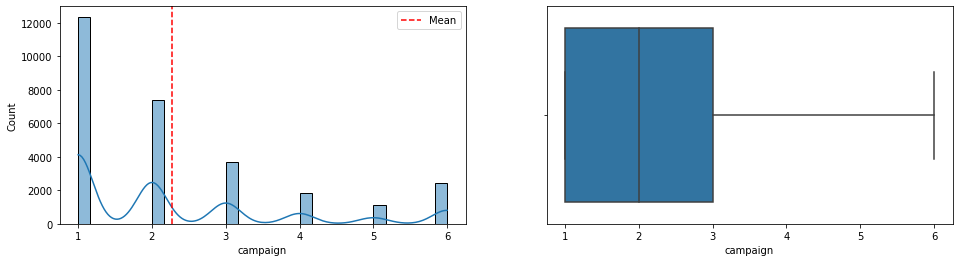

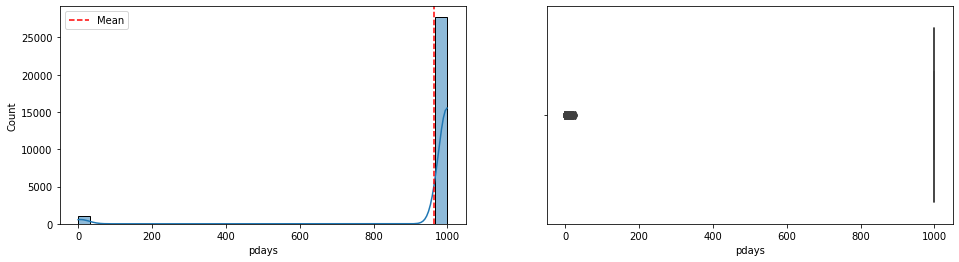

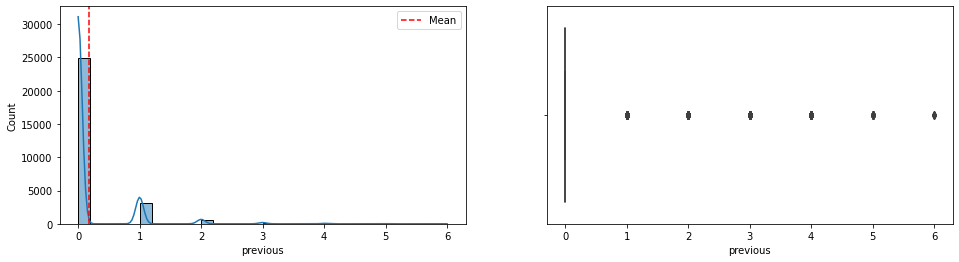

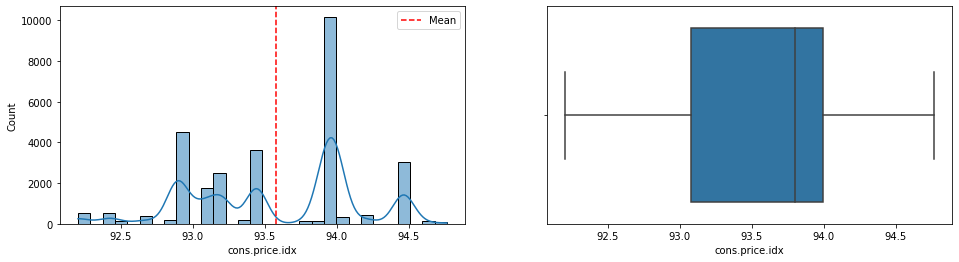

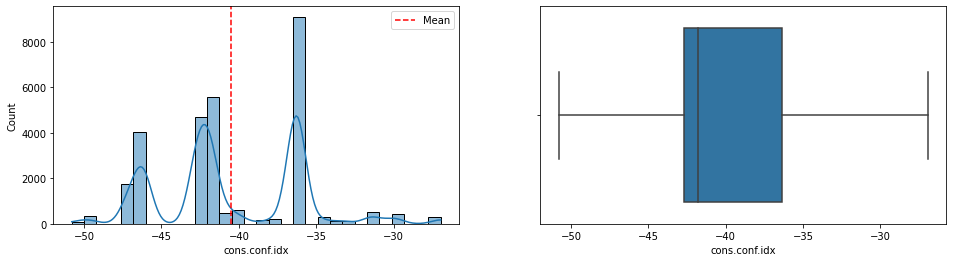

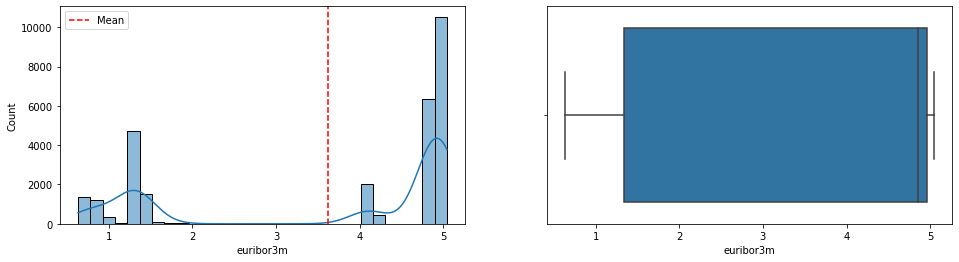

In [30]:
num_train = X_train._get_numeric_data()
for i in num_train:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_train[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_train[i], ax = axs[1])

  axs[0].axvline(num_train[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

###Handling Outliers on Test Set

In [31]:
num_test = X_test._get_numeric_data()
for k, v in num_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 1.04%
Column month outliers = 0.00%
Column day_of_week outliers = 0.00%
Column duration outliers = 6.94%
Column campaign outliers = 7.87%
Column pdays outliers = 100.00%
Column previous outliers = 100.00%
Column cons.price.idx outliers = 0.00%
Column cons.conf.idx outliers = 1.06%
Column euribor3m outliers = 0.00%


In [32]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['campaign','cons.conf.idx','duration'])

windsoriser.fit(X_test)

X_test = windsoriser.transform(X_test)

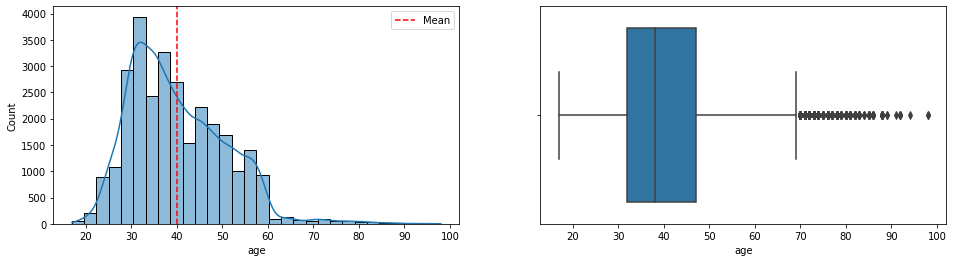

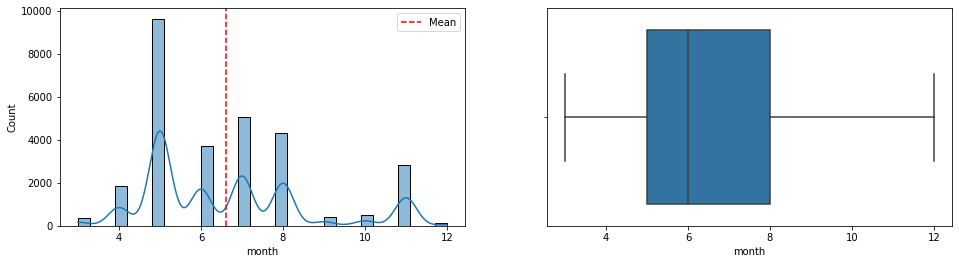

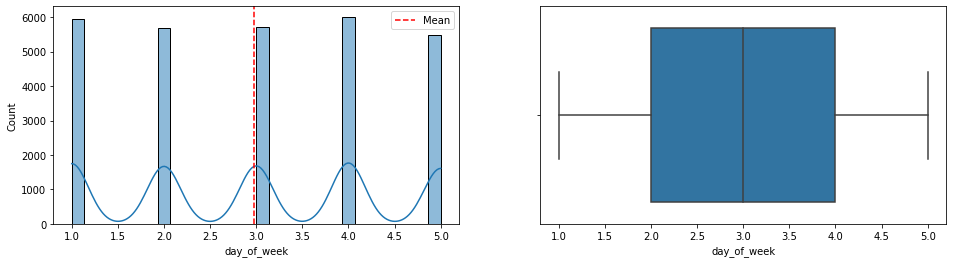

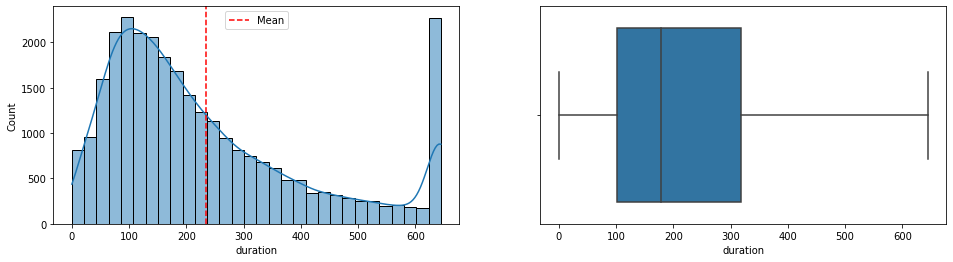

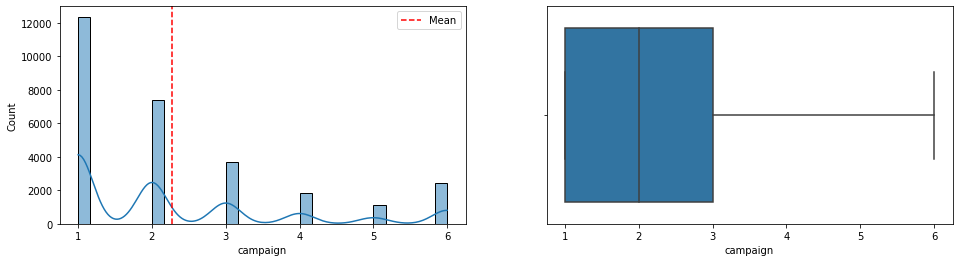

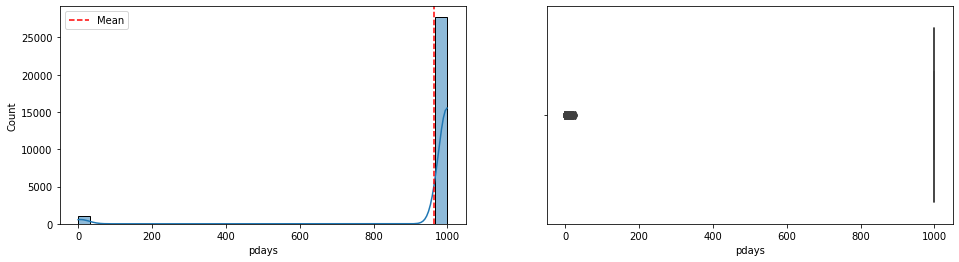

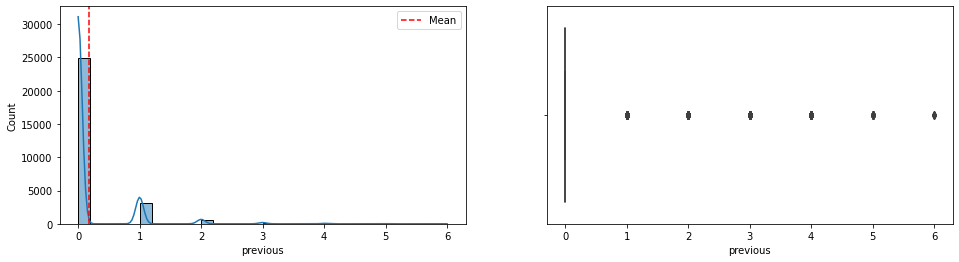

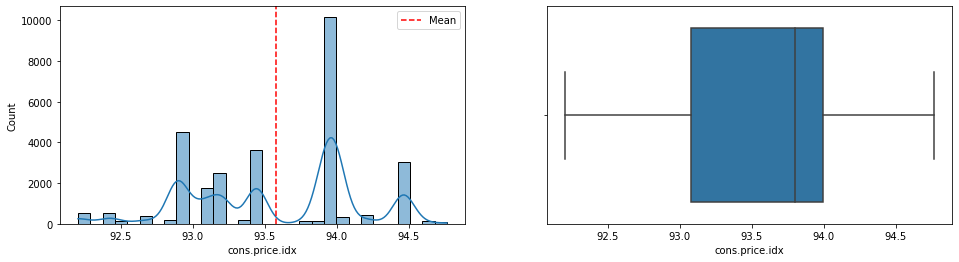

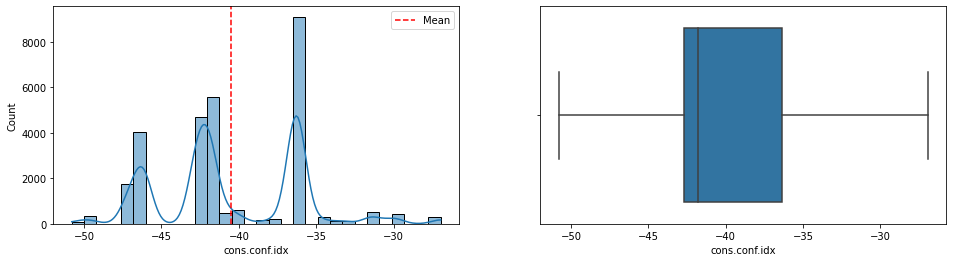

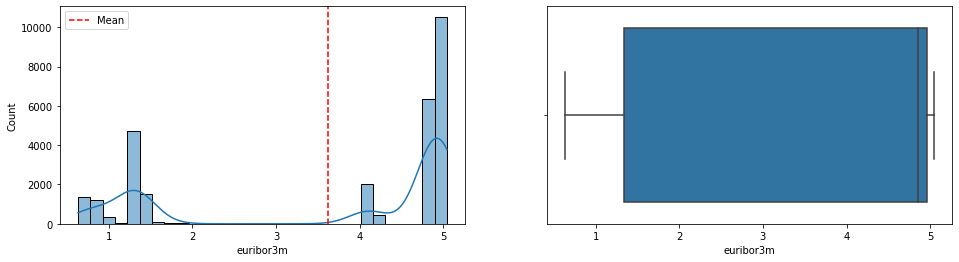

In [33]:
num_train = X_train._get_numeric_data()
for i in num_train:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_train[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_train[i], ax = axs[1])

  axs[0].axvline(num_train[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

##Feature Selection

In [34]:
X_train_num = X_train._get_numeric_data()

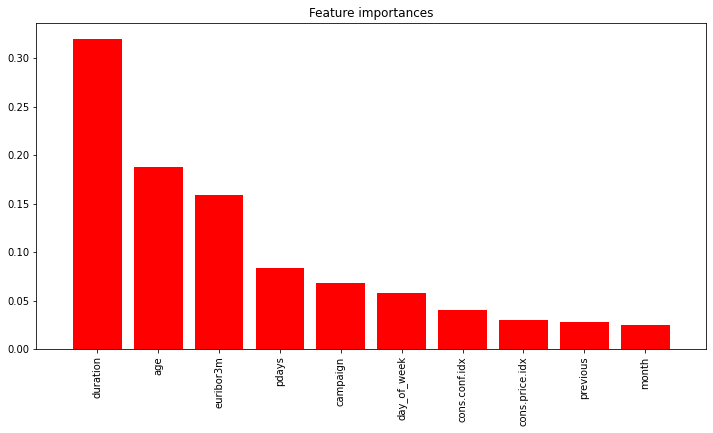

In [35]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X_train_num, y_train)

# feature_importances_ dari highest ke lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train_num.shape[1]), model.feature_importances_[sorted_idx],
        color="r", align="center")
plt.xticks(range(X_train_num.shape[1]), X_train_num.columns[sorted_idx], rotation=90)
plt.xlim([-1, X_train_num.shape[1]])
plt.show()

In above process, there are some features that we'd like to keep. Which are  

So will goint to drop unused columns

In [36]:
X_train.drop(['day_of_week','campaign','cons.price.idx','month', 'job','education','contact','pdays'], axis = 1, inplace = True)
X_test.drop(['day_of_week','campaign','cons.price.idx','month', 'job','education','contact','pdays'], axis = 1, inplace = True)

In [37]:
X_train.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'duration', 'previous',
       'poutcome', 'cons.conf.idx', 'euribor3m'],
      dtype='object')

##Feature Encoding

In [38]:
X_train = pd.get_dummies(X_train, prefix='', prefix_sep='', 
                            columns=['marital','default','housing','loan','poutcome'])
X_test = pd.get_dummies(X_test, prefix='', prefix_sep='', 
                            columns=['marital','default','housing','loan','poutcome'])

In [39]:
X_train.shape, X_test.shape

((28831, 21), (12357, 21))

#Build Pipeline

In [40]:
pipe_log = Pipeline([
('scaler', StandardScaler()),
('logreg', LogisticRegression(random_state=42))])

pipe_knn = Pipeline([
('scaler', StandardScaler()),
('knn', KNeighborsClassifier())                    
])

pipe_nb = Pipeline([
('scaler', StandardScaler()),
('nb', GaussianNB())
])

pipe_cat = Pipeline([
('scaler', StandardScaler()),
('catboost', CatBoostClassifier(random_state=42))
])

pipe_dt = Pipeline([
('scaler', StandardScaler()),
('dectree', DecisionTreeClassifier(random_state=42))                    
])

pipe_svm = Pipeline([
('scaler', StandardScaler()),
('svc', SVC(random_state=42))
])

pipe_rf = Pipeline([
('scaler', StandardScaler()),
('rf', RandomForestClassifier(random_state=42))                    
])

#Modelling & Evaluation for Base Model

##**Logistic Regression**

In [41]:
pipe_log.fit(X_train, y_train)
print('Training Score: ',round(pipe_log.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_log.score(X_test, y_test),4))

Training Score:  0.9067
Testing Score:  0.9051


In [42]:
y_logreg_pred = pipe_log.predict(X_test)
y_logreg_pred

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
target = ['No', 'Yes']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

          No       0.92      0.97      0.95     10965
         Yes       0.63      0.38      0.47      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357



In [44]:
print(roc_auc_score(y_test, y_logreg_pred))

0.6743105020677076


##**KNN**

In [45]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.925
Testing Score:  0.8961


In [46]:
y_knn_pred = pipe_knn.predict(X_test)
y_knn_pred

array([1, 0, 0, ..., 0, 0, 0])

In [47]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10965
           1       0.55      0.43      0.48      1392

    accuracy                           0.90     12357
   macro avg       0.74      0.69      0.71     12357
weighted avg       0.89      0.90      0.89     12357



In [48]:
print(roc_auc_score(y_test, y_knn_pred))

0.6930822208594746


##**Naive Bayes**

In [49]:
pipe_nb.fit(X_train, y_train)
print('Training Score: ',round(pipe_nb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_nb.score(X_test, y_test),4))

Training Score:  0.2741
Testing Score:  0.2773


In [50]:
y_nb_pred = pipe_nb.predict(X_test)
y_nb_pred

array([1, 0, 1, ..., 1, 1, 1])

In [51]:
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.99      0.19      0.31     10965
           1       0.13      0.99      0.24      1392

    accuracy                           0.28     12357
   macro avg       0.56      0.59      0.28     12357
weighted avg       0.90      0.28      0.31     12357



In [52]:
print(roc_auc_score(y_test, y_nb_pred))

0.5886729130304889


##**Catboost**

In [53]:
pipe_cat.fit(X_train, y_train)
print('Training Score: ',round(pipe_cat.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_cat.score(X_test, y_test),4))

Learning rate set to 0.043281
0:	learn: 0.6320883	total: 55.8ms	remaining: 55.7s
1:	learn: 0.5787957	total: 65.2ms	remaining: 32.5s
2:	learn: 0.5274775	total: 73.4ms	remaining: 24.4s
3:	learn: 0.4867181	total: 81.7ms	remaining: 20.3s
4:	learn: 0.4495485	total: 89.7ms	remaining: 17.8s
5:	learn: 0.4196663	total: 101ms	remaining: 16.7s
6:	learn: 0.3882862	total: 114ms	remaining: 16.1s
7:	learn: 0.3663304	total: 124ms	remaining: 15.3s
8:	learn: 0.3458318	total: 132ms	remaining: 14.5s
9:	learn: 0.3297884	total: 141ms	remaining: 14s
10:	learn: 0.3165944	total: 150ms	remaining: 13.5s
11:	learn: 0.3033280	total: 158ms	remaining: 13s
12:	learn: 0.2902752	total: 167ms	remaining: 12.7s
13:	learn: 0.2803999	total: 175ms	remaining: 12.3s
14:	learn: 0.2724516	total: 183ms	remaining: 12s
15:	learn: 0.2622577	total: 192ms	remaining: 11.8s
16:	learn: 0.2530602	total: 204ms	remaining: 11.8s
17:	learn: 0.2469168	total: 213ms	remaining: 11.6s
18:	learn: 0.2422501	total: 222ms	remaining: 11.4s
19:	learn: 0

In [54]:
y_cat_pred = pipe_cat.predict(X_test)
y_cat_pred

array([1, 0, 0, ..., 0, 0, 0])

In [55]:
print(classification_report(y_test, y_cat_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.51      0.57      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [56]:
print(roc_auc_score(y_test, y_cat_pred))

0.7367488835951382


##**SVM**

In [61]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.9074
Testing Score:  0.9041


In [62]:
y_svm_pred = pipe_svm.predict(X_test)
y_svm_pred

array([1, 0, 0, ..., 0, 0, 0])

In [63]:
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.66      0.30      0.42      1392

    accuracy                           0.90     12357
   macro avg       0.79      0.64      0.68     12357
weighted avg       0.89      0.90      0.89     12357



In [64]:
print(roc_auc_score(y_test, y_svm_pred))

0.6417765382014875


##**Decision Tree**

In [57]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  0.9975
Testing Score:  0.8856


In [58]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([1, 0, 0, ..., 0, 0, 0])

In [59]:
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10965
           1       0.49      0.50      0.50      1392

    accuracy                           0.89     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [60]:
print(roc_auc_score(y_test, y_dt_pred))

0.7182002492255924


##**Random Forest**

In [65]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  0.9975
Testing Score:  0.9048


In [66]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([1, 0, 0, ..., 0, 0, 0])

In [67]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.59      0.49      0.54      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.72      0.74     12357
weighted avg       0.90      0.90      0.90     12357



In [68]:
print(roc_auc_score(y_test, y_rf_pred))

0.7230946428290642


#Base Model Comparison

###**Accuracy**

In [69]:
dt = pipe_dt.score(X_test, y_test)
rf = pipe_rf.score(X_test, y_test)
log = pipe_log.score(X_test, y_test)
knn = pipe_knn.score(X_test, y_test)
svm = pipe_svm.score(X_test, y_test)
catboost = pipe_cat.score(X_test, y_test)

print('Logistic Regression : ', round(log,2)*100, '%')

print('Decision Tree : ',round(dt,2)*100, '%')
print('Random Forest : ',round(rf,2)*100, '%')

print('KNN : ', round(knn,2)*100, '%')
print('SVM : ', round(svm,2)*100, '%')
print('CatBoost : ', round(catboost,2)*100, '%')

Logistic Regression :  91.0 %
Decision Tree :  89.0 %
Random Forest :  90.0 %
KNN :  90.0 %
SVM :  90.0 %
CatBoost :  91.0 %


###**F1-Score**

In [70]:
log = f1_score(y_test, pipe_log.predict(X_test))
dt = f1_score(y_test, pipe_dt.predict(X_test))
rf = f1_score(y_test, pipe_rf.predict(X_test))
knn = f1_score(y_test, pipe_knn.predict(X_test))
svm = f1_score(y_test, pipe_svm.predict(X_test))
catboost = f1_score(y_test, pipe_cat.predict(X_test))

print('Logistic Regression : ', round(log,2)*100, '%')

print('Decision Tree : ',round(dt,2)*100, '%')
print('Random Forest : ',round(rf,2)*100, '%')

print('KNN : ', round(knn,2)*100, '%')
print('SVM : ', round(svm,2)*100, '%')
print('CatBoost : ', round(catboost,2)*100, '%')

Logistic Regression :  47.0 %
Decision Tree :  50.0 %
Random Forest :  54.0 %
KNN :  48.0 %
SVM :  42.0 %
CatBoost :  56.99999999999999 %


###**ROC-AUC**

In [71]:
log = roc_auc_score(y_test, pipe_log.predict(X_test))
dt = roc_auc_score(y_test, pipe_dt.predict(X_test))
rf = roc_auc_score(y_test, pipe_rf.predict(X_test))
knn = roc_auc_score(y_test, pipe_knn.predict(X_test))
svm = roc_auc_score(y_test, pipe_svm.predict(X_test))
catboost = roc_auc_score(y_test, pipe_cat.predict(X_test))

print('Logistic Regression : ', round(log,2)*100, '%')

print('Decision Tree : ',round(dt,2)*100, '%')
print('Random Forest : ',round(rf,2)*100, '%')

print('KNN : ', round(knn,2)*100, '%')
print('SVM : ', round(svm,2)*100, '%')
print('CatBoost : ', round(catboost,2)*100, '%')

Logistic Regression :  67.0 %
Decision Tree :  72.0 %
Random Forest :  72.0 %
KNN :  69.0 %
SVM :  64.0 %
CatBoost :  74.0 %


In [72]:
models = {
    'Logistic Regression' : pipe_log,
    'KNN' : pipe_knn,
    'SVM' : pipe_svm,
    'Catboost' : pipe_cat,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'Naive Bayes' : pipe_nb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
    'ROC-AUC Score' : roc_auc_score
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score','ROC-AUC Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [73]:
df_model

,Logistic Regression,KNN,SVM,Catboost,Decision Tree,Random Forest,Naive Bayes
Accuracy,0.905074,0.896091,0.904103,0.912924,0.885571,0.904831,0.277252
F1-Score,0.47186,0.483092,0.415968,0.568565,0.497155,0.536278,0.235948
ROC-AUC Score,0.674311,0.693082,0.641777,0.736749,0.7182,0.723095,0.588673


#Model Optimization

In [74]:
##Parameter Tuning

param_log = {
    'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()],
    'logreg__penalty' : ['l1','l2','elastincnet','none'],
    'logreg__C' : [0.001, 0.01, 0.1, 1],
    'logreg__solver' : ['newton-cg', 'lbfgs','libniear','sag','saga']
}
param_knn = {
    'scaler' : [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'knn__n_neighbors' : np.arange(1,5),
    'knn__p' : [1,2],
    'knn__weights' : ['uniform', 'distance']
}
param_nb = {
    'scaler' : [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'nb__var_smoothing' : np.logspace(0,-9, num=100)
}
param_cat = {
    'scaler' : [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'catboost__learning_rate' : [0.1, 0.01, 0.001],
    'catboost__bagging_temperature' : [0.0, 1.0],
    'catboost__n_estimators':np.arange(100,501,100)
}
param_dt = {
    'scaler' : [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'dectree__criterion' : ['gini','entropy'],
    'dectree__max_depth' : np.arange(2,8),
    'dectree__min_samples_leaf' : np.arange(2,8),
    'dectree__min_samples_split' : np.arange(2,8),
    'dectree__max_features' : ['auto','sqrt','log2']
}
param_svm = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'svc__C' : [ 0.1, 1, 100]
}
param_rf = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'rf__criterion' : ['gini', 'entropy'],
    'rf__n_estimators' : np.arange(100,501, 100),
    'rf__max_depth' : np.arange(2,8,2)
}

##Model Tuning Results and Evaluation

###**Logistic Regression**

In [75]:
grid_logreg = GridSearchCV(pipe_log, param_log, cv=10).fit(X_train, y_train)

In [76]:
print('Train Set Score : ', grid_logreg.score(X_train, y_train))
print('Test Set Score : ', grid_logreg.score(X_test, y_test))

Train Set Score :  0.9070098158232458
Test Set Score :  0.9056405276361577


In [77]:
best_param_logreg = grid_logreg.best_params_
print(best_param_logreg)
print('\n')
best_pipe_logreg = grid_logreg.best_estimator_
print(best_pipe_logreg)
print('\n')
result_df_logreg = pd.DataFrame.from_dict(grid_logreg.cv_results_, orient='columns')
print(result_df_logreg.columns)

{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg', 'scaler': MinMaxScaler()}


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, random_state=42,
                                    solver='newton-cg'))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_logreg__C', 'param_logreg__penalty', 'param_logreg__solver',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


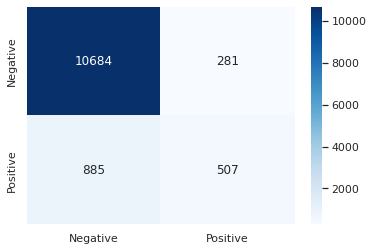

In [78]:
cf = confusion_matrix(y_test, best_pipe_logreg.predict(X_test))

sns.set(rc = {'figure.figsize' : (6,4)})

ax = sns.heatmap(cf, annot = True, cmap = 'Blues',fmt = 'g')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(["Negative", 'Positive'])
plt.show()

In [79]:
print(classification_report(y_test, best_pipe_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10965
           1       0.64      0.36      0.47      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357



In [80]:
print(roc_auc_score(y_test, best_pipe_logreg.predict(X_test)))

0.6692985714734973


###**KNN**

In [81]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=10).fit(X_train, y_train)

In [82]:
print('Train Set Score : ', grid_knn.score(X_train, y_train))
print('Test Set Score : ', grid_knn.score(X_test, y_test))

Train Set Score :  0.9274045298463459
Test Set Score :  0.8977907259043457


In [83]:
best_param_knn = grid_knn.best_params_
print(best_param_knn)
print('\n')
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

{'knn__n_neighbors': 4, 'knn__p': 2, 'knn__weights': 'uniform', 'scaler': MinMaxScaler()}


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_knn__n_neighbors', 'param_knn__p', 'param_knn__weights',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [84]:
print(classification_report(y_test, best_pipe_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10965
           1       0.58      0.32      0.42      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.65      0.68     12357
weighted avg       0.88      0.90      0.88     12357



In [85]:
print(roc_auc_score(y_test, best_pipe_knn.predict(X_test)))

0.6463732566001541


###**Naive Bayes**

In [86]:
grid_nb = GridSearchCV(pipe_nb, param_nb, cv=10).fit(X_train, y_train)

In [87]:
print('Train Set Score : ', grid_nb.score(X_train, y_train))
print('Test Set Score : ', grid_nb.score(X_test, y_test))

Train Set Score :  0.900315632478929
Test Set Score :  0.8990855385611395


In [88]:
best_param_nb = grid_nb.best_params_
print(best_param_nb)
print('\n')
best_pipe_nb = grid_nb.best_estimator_
print(best_pipe_nb)
print('\n')
result_df_nb = pd.DataFrame.from_dict(grid_nb.cv_results_, orient='columns')
print(result_df_nb.columns)

{'nb__var_smoothing': 0.8111308307896871, 'scaler': MinMaxScaler()}


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('nb', GaussianNB(var_smoothing=0.8111308307896871))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_nb__var_smoothing', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [89]:
print(classification_report(y_test, best_pipe_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10965
           1       0.72      0.17      0.28      1392

    accuracy                           0.90     12357
   macro avg       0.81      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357



In [90]:
print(roc_auc_score(y_test, best_pipe_nb.predict(X_test)))

0.5821885269745428


###**Catboost**

In [91]:
grid_cat = GridSearchCV(pipe_cat, param_cat, cv=10).fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6916704	total: 7.36ms	remaining: 3.67s
1:	learn: 0.6902473	total: 14.4ms	remaining: 3.58s
2:	learn: 0.6885250	total: 22.4ms	remaining: 3.71s
3:	learn: 0.6870241	total: 29.9ms	remaining: 3.7s
4:	learn: 0.6853050	total: 37.4ms	remaining: 3.71s
5:	learn: 0.6836176	total: 45ms	remaining: 3.7s
6:	learn: 0.6819098	total: 52.6ms	remaining: 3.71s
7:	learn: 0.6805976	total: 60.1ms	remaining: 3.7s
8:	learn: 0.6791008	total: 67.8ms	remaining: 3.7s
9:	learn: 0.6775173	total: 75.7ms	remaining: 3.71s
10:	learn: 0.6760885	total: 83.1ms	remaining: 3.69s
11:	learn: 0.6745818	total: 90.7ms	remaining: 3.69s
12:	learn: 0.6731692	total: 99ms	remaining: 3.71s
13:	learn: 0.6715963	total: 107ms	remaining: 3.7s
14:	learn: 0.6703752	total: 114ms	remaining: 3.69s
15:	learn: 0.6690287	total: 122ms	remaining: 3.69s
16:	learn: 0.6675454	total: 129ms	remaining: 3.67s
17:	learn: 0.6661396	total: 137ms	remaining: 3.66s
18:	learn: 0.6645788	total: 144ms	rem

In [92]:
print('Train Set Score : ', grid_cat.score(X_train, y_train))
print('Test Set Score : ', grid_cat.score(X_test, y_test))

Train Set Score :  0.9174152821615622
Test Set Score :  0.9133284777858703


In [93]:
best_param_cat = grid_cat.best_params_
print(best_param_cat)
print('\n')
best_pipe_cat = grid_cat.best_estimator_
print(best_pipe_cat)
print('\n')
result_df_cat = pd.DataFrame.from_dict(grid_cat.cv_results_, orient='columns')
print(result_df_cat.columns)

{'catboost__bagging_temperature': 0.0, 'catboost__learning_rate': 0.01, 'catboost__n_estimators': 500, 'scaler': StandardScaler()}


Pipeline(steps=[('scaler', StandardScaler()),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7f80ead6ead0>)])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_catboost__bagging_temperature', 'param_catboost__learning_rate',
       'param_catboost__n_estimators', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [94]:
print(classification_report(y_test, best_pipe_cat.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.68      0.44      0.53      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.71      0.74     12357
weighted avg       0.90      0.91      0.91     12357



In [95]:
print(roc_auc_score(y_test, best_pipe_cat.predict(X_test)))

0.7065580923628474


###**SVM**

In [101]:
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=10).fit(X_train, y_train)

In [102]:
print('Train Set Score : ', grid_svm.score(X_train, y_train))
print('Test Set Score : ', grid_svm.score(X_test, y_test))

Train Set Score :  0.9074260344767785
Test Set Score :  0.9041029376062151


In [103]:
best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

{'scaler': StandardScaler(), 'svc__C': 1}


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_scaler', 'param_svc__C', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


In [104]:
print(classification_report(y_test, best_pipe_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.66      0.30      0.42      1392

    accuracy                           0.90     12357
   macro avg       0.79      0.64      0.68     12357
weighted avg       0.89      0.90      0.89     12357



In [105]:
print(roc_auc_score(y_test, best_pipe_svm.predict(X_test)))

0.6417765382014875


In [100]:
print(roc_auc_score(y_test, best_pipe_dt.predict(X_test)))

0.6338798410302372


###**Decision Tree**

In [96]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=10).fit(X_train, y_train)

In [97]:
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

Train Set Score :  0.9065589122819188
Test Set Score :  0.902889050740471


In [98]:
best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'dectree__criterion': 'gini', 'dectree__max_depth': 7, 'dectree__max_features': 'auto', 'dectree__min_samples_leaf': 3, 'dectree__min_samples_split': 2, 'scaler': StandardScaler()}


Pipeline(steps=[('scaler', StandardScaler()),
                ('dectree',
                 DecisionTreeClassifier(max_depth=7, max_features='auto',
                                        min_samples_leaf=3, random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_dectree__criterion', 'param_dectree__max_depth',
       'param_dectree__max_features', 'param_dectree__min_samples_leaf',
       'param_dectree__min_samples_split', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
  

In [99]:
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.66      0.29      0.40      1392

    accuracy                           0.90     12357
   macro avg       0.79      0.63      0.67     12357
weighted avg       0.89      0.90      0.89     12357



###**Random Forest**

In [106]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=10).fit(X_train, y_train)

In [107]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  0.9057958447504423
Test Set Score :  0.9028081249494214


In [108]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'rf__criterion': 'gini', 'rf__max_depth': 6, 'rf__n_estimators': 100, 'scaler': StandardScaler()}


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=6, random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_rf__criterion', 'param_rf__max_depth', 'param_rf__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [109]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.75      0.20      0.32      1392

    accuracy                           0.90     12357
   macro avg       0.83      0.60      0.63     12357
weighted avg       0.89      0.90      0.88     12357



In [110]:
print(roc_auc_score(y_test, best_pipe_rf.predict(X_test)))

0.5977707281790021


#Model After Tuning Comparison

###**Accuracy**

In [111]:
dt_acc = best_pipe_dt.score(X_test, y_test)
rf_acc = best_pipe_rf.score(X_test, y_test)
log_acc = best_pipe_logreg.score(X_test, y_test)
knn_acc = best_pipe_knn.score(X_test, y_test)
svm_acc = best_pipe_svm.score(X_test, y_test)
catboost_acc = best_pipe_cat.score(X_test, y_test)

print('Logistic Regression : ', round(log_acc,2)*100, '%')

print('Decision Tree : ',round(dt_acc,2)*100, '%')
print('Random Forest : ',round(rf_acc,2)*100, '%')

print('KNN : ', round(knn_acc,2)*100, '%')
print('SVM : ', round(svm_acc,2)*100, '%')
print('CatBoost : ', round(catboost_acc,2)*100, '%')

Logistic Regression :  91.0 %
Decision Tree :  90.0 %
Random Forest :  90.0 %
KNN :  90.0 %
SVM :  90.0 %
CatBoost :  91.0 %


###**F1-Score**

In [112]:
log_f1 = f1_score(y_test, best_pipe_logreg.predict(X_test))
dt_f1 = f1_score(y_test, best_pipe_dt.predict(X_test))
rf_f1 = f1_score(y_test, best_pipe_rf.predict(X_test))
knn_f1 = f1_score(y_test, best_pipe_knn.predict(X_test))
svm_f1 = f1_score(y_test, best_pipe_svm.predict(X_test))
catboost_f1 = f1_score(y_test, best_pipe_cat.predict(X_test))


print('Logistic Regression : ', round(log_f1,2)*100, '%')

print('Decision Tree : ',round(dt_f1,2)*100, '%')
print('Random Forest : ',round(rf_f1,2)*100, '%')

print('KNN : ', round(knn_f1,2)*100, '%')
print('SVM : ', round(svm_f1,2)*100, '%')
print('CatBoost : ', round(catboost_f1,2)*100, '%')

Logistic Regression :  47.0 %
Decision Tree :  40.0 %
Random Forest :  32.0 %
KNN :  42.0 %
SVM :  42.0 %
CatBoost :  53.0 %


###**ROC-AUC**

In [113]:
log_roc = roc_auc_score(y_test, best_pipe_logreg.predict(X_test))
dt_roc = roc_auc_score(y_test, best_pipe_dt.predict(X_test))
rf_roc = roc_auc_score(y_test, best_pipe_rf.predict(X_test))
knn_roc = roc_auc_score(y_test, best_pipe_knn.predict(X_test))
svm_roc = roc_auc_score(y_test, best_pipe_svm.predict(X_test))
catboost_roc = roc_auc_score(y_test, best_pipe_cat.predict(X_test))

print('Logistic Regression : ', round(log_roc,2)*100, '%')

print('Decision Tree : ',round(dt_roc,2)*100, '%')
print('Random Forest : ',round(rf_roc,2)*100, '%')

print('KNN : ', round(knn_roc,2)*100, '%')
print('SVM : ', round(svm_roc,2)*100, '%')
print('CatBoost : ', round(catboost_roc,2)*100, '%')

Logistic Regression :  67.0 %
Decision Tree :  63.0 %
Random Forest :  60.0 %
KNN :  65.0 %
SVM :  64.0 %
CatBoost :  71.0 %


##Model After Tuning Comparison

In [114]:
models = {
    'Logistic Regression' : best_pipe_logreg,
    'KNN' : best_pipe_knn,
    'SVM' : best_pipe_svm,
    'Catboost' : best_pipe_cat,
    'Decision Tree' : best_pipe_dt,
    'Random Forest' : best_pipe_rf,
    'Naive Bayes' : best_pipe_nb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
    'ROC-AUC Score' : roc_auc_score
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score','ROC-AUC Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [115]:
df_model

,Logistic Regression,KNN,SVM,Catboost,Decision Tree,Random Forest,Naive Bayes
Accuracy,0.905641,0.897791,0.904103,0.913328,0.902889,0.902808,0.899086
F1-Score,0.465138,0.415007,0.415968,0.533333,0.399399,0.321085,0.278774
ROC-AUC Score,0.669299,0.646373,0.641777,0.706558,0.63388,0.597771,0.582189


From Accuracy, F1-Score, and ROC-AUC Score, the best result goes to Catboost Model with accuracy score 91%, 55% in F1-Score, and 72% in ROC-AUC Score.

So, we could say in this dataset the **best model to use is Catboost model**.

#Model Inference
---

In this model inference, we use new dataset into our model or also referred to as “operationalizing a machine learning model” or “putting a machine learning model into production.” 

In this process, the new dataset we get from shuffled dataset.

##Data Loading

In [116]:
df_inf = shuffle(df)
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
40015,37,admin.,single,high.school,no,no,no,cellular,7,4,609,2,7,3,success,94.215,-40.3,0.782,1
7169,37,blue-collar,single,professional.course,no,yes,no,telephone,5,4,105,3,999,0,nonexistent,93.994,-36.4,4.860,0
30358,28,admin.,married,university.degree,no,yes,no,cellular,4,4,63,1,999,0,nonexistent,93.075,-47.1,1.365,0
38061,34,admin.,married,university.degree,no,no,no,telephone,9,5,290,2,999,0,nonexistent,92.379,-29.8,0.773,1
27090,30,services,single,university.degree,no,yes,no,cellular,11,5,13,3,999,0,nonexistent,93.200,-42.0,4.021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20477,31,self-employed,married,university.degree,no,no,no,cellular,8,2,201,2,999,0,nonexistent,93.444,-36.1,4.966,0
4466,40,blue-collar,married,basic.6y,unknown,no,no,telephone,5,2,85,2,999,0,nonexistent,93.994,-36.4,4.856,0
5939,37,blue-collar,married,professional.course,no,yes,no,telephone,5,2,160,6,999,0,nonexistent,93.994,-36.4,4.857,0
17259,53,retired,married,professional.course,no,no,no,cellular,7,5,124,2,999,0,nonexistent,93.918,-42.7,4.962,0


##Future Selection

In [117]:
X_inf = df.loc[:, ['age', 'marital', 'default', 'housing', 'loan', 'duration', 'previous',
       'poutcome', 'cons.conf.idx', 'euribor3m']]
y_inf = df['y'].values


In [118]:
X_inf.shape, y_inf.shape

((41188, 10), (41188,))

##Handling Outliers

In [119]:
X_inf = X_inf._get_numeric_data()
for k, v in X_inf.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_inf)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 1.14%
Column duration outliers = 7.19%
Column previous outliers = 100.00%
Column cons.conf.idx outliers = 1.09%
Column euribor3m outliers = 0.00%


In [120]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['duration', 'cons.conf.idx'])

windsoriser.fit(X_inf)

X_inf = windsoriser.transform(X_inf)

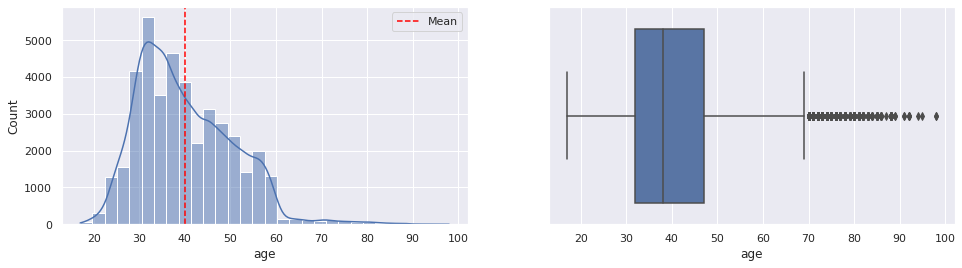

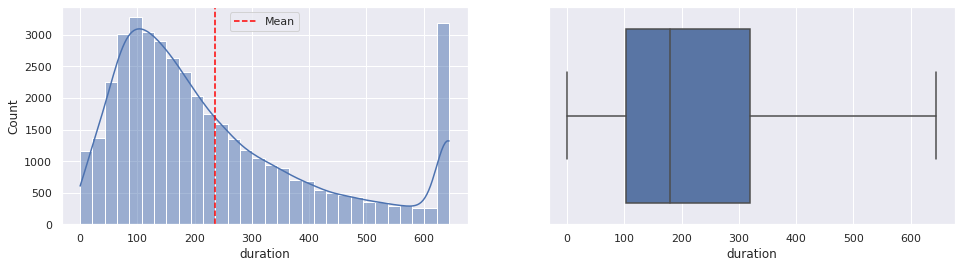

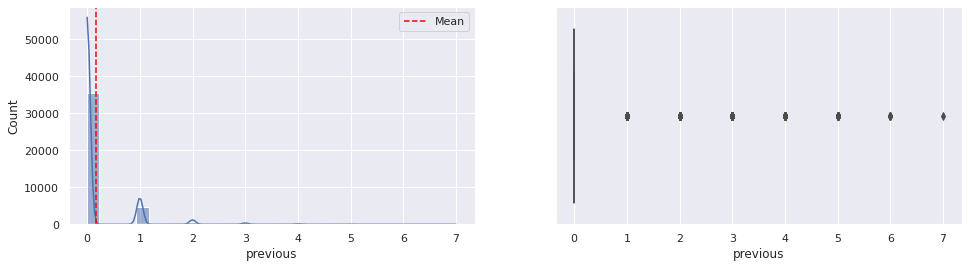

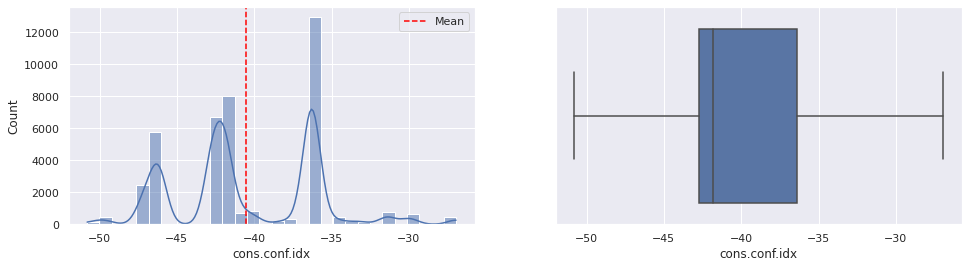

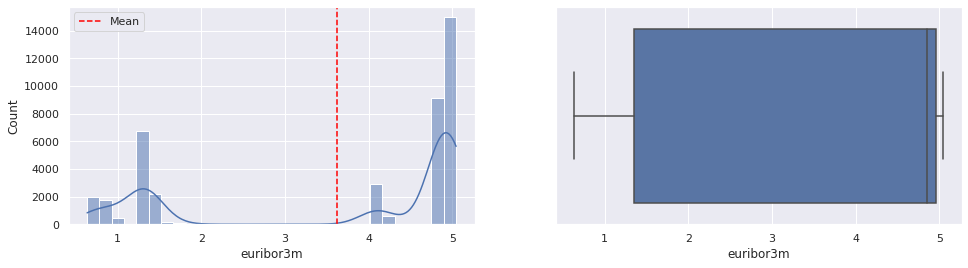

In [121]:
for i in X_inf:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(X_inf[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(X_inf[i], ax = axs[1])

  axs[0].axvline(X_inf[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()

##Model Implementation
---

Based on the metrics evaluation that we did, Catboost has the best result. So, we will use Random Forest model in this process

In [122]:
best_pipe_cat.fit(X_inf, y_inf)

0:	learn: 0.6748949	total: 15.6ms	remaining: 7.77s
1:	learn: 0.6611863	total: 26.7ms	remaining: 6.65s
2:	learn: 0.6462197	total: 36.3ms	remaining: 6.02s
3:	learn: 0.6307006	total: 46.1ms	remaining: 5.72s
4:	learn: 0.6145576	total: 55.8ms	remaining: 5.52s
5:	learn: 0.5992626	total: 65ms	remaining: 5.35s
6:	learn: 0.5872191	total: 74.7ms	remaining: 5.26s
7:	learn: 0.5748168	total: 84ms	remaining: 5.17s
8:	learn: 0.5630576	total: 95.9ms	remaining: 5.23s
9:	learn: 0.5521253	total: 107ms	remaining: 5.26s
10:	learn: 0.5407123	total: 117ms	remaining: 5.19s
11:	learn: 0.5306174	total: 126ms	remaining: 5.12s
12:	learn: 0.5210871	total: 135ms	remaining: 5.06s
13:	learn: 0.5096534	total: 144ms	remaining: 5.01s
14:	learn: 0.4995196	total: 155ms	remaining: 5s
15:	learn: 0.4906301	total: 167ms	remaining: 5.04s
16:	learn: 0.4804213	total: 177ms	remaining: 5.03s
17:	learn: 0.4710338	total: 187ms	remaining: 5s
18:	learn: 0.4619608	total: 196ms	remaining: 4.97s
19:	learn: 0.4544116	total: 206ms	remainin

Pipeline(steps=[('scaler', StandardScaler()),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7f80ead6ead0>)])

In [123]:
y_inv_pred = best_pipe_cat.predict(X_inf)
y_inv_pred

array([0, 0, 0, ..., 0, 1, 0])

In [124]:
yes = 0
no = 0
for i in y_inv_pred:
  if i == 1:
    yes+=1
  else:
    no+=1
print('yes precentage:', round(yes/len(y_inv_pred),2)*100, '%')
print('no precentage:', round(no/len(y_inv_pred),2)*100, '%')

yes precentage: 8.0 %
no precentage: 92.0 %


#Conclusion

---

Using marketing campaign based on phone calls dataset, we will predict if a person would subscribe a term deposit or not.

From the Exploratory Data Analysis (EDA), we can see that the data is extremely imbalance. That is why we should take it into account when processing the data.
Also, from the EDA, we could say that:


*   Based on the age group most of 30-ish years tend to subscribe a deposit than any other age group
*   In marital status group married couple likely to subscribe deposit than single and divorced status. This could likely become one of our features. 
* Education does not affect the target variables
* There are high correlation between some features: 
** euribor3m - emp.var.rate (97%)
** nr.employed - emp.var.rate (91%)
** nr.employed - euribor3m (95%)
* There is no significant correlation between features and label, but feature that we should take into account is duration and previous

So, Features that we likely to keep are 'age', 'marital', 'default', 'housing', 'loan', 'duration', 'previous', 'poutcome', 'cons.conf.idx', and 'euribor3m'

Algorithm that we use in to make the model are Logistic Regression, Naive Bayes, SVM, Catboost, Random Forest, Decision Tree, and KNN.


We compare the baseline model and model after tuning,

before we tuning the model, these are the result that we have,
<img src='https://drive.google.com/uc?id=16wSPrwYPVoIM_YowV1R_dhMgQtKryWWi'>

Since dataset that we use is extremely imbalance, using accuracy it is not the right metrics, we can see that from the F1-Score the models are very bad. So what are the results after tuning the models?

<img src='https://drive.google.com/uc?id=1fLnWSlEofOlmpul5sGk4dg562arojFMd'>

There are some models have better score before tuning the model. But overall score, these models are having a pretty bad scores, this could be possibly because how high the imbalance the data is. 

From the models, the best model using this dataset is Catboost before tuning.

